# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

Thomas Waddleton


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the origin. The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

In [3]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

nSteps = 1000

steps = np.arange(0, nSteps)

def drunkard_1d(nSteps):
    position = 0
    disp = []
    dispsq = []
    for i in range(nSteps):
        x = random()
        if (x > 0.5):
            change = 1
        else:
            change = -1
            
        position += change
        disp.append(position)
        dispsq.append(position**2)
    return disp, dispsq

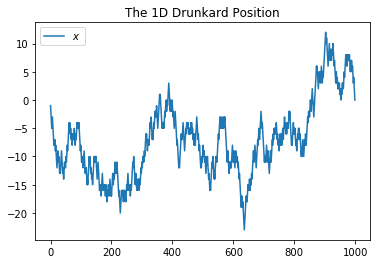

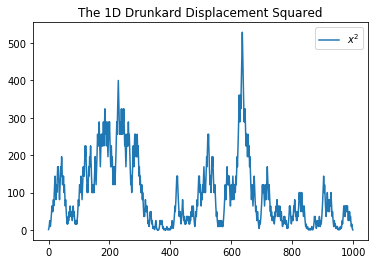

In [31]:
xpos, xpossq = drunkard_1d(nSteps)

xp_np = np.array(xpos)
xsqp_np = np.array(xpossq)

plt.plot(steps, xp_np, label='$x$')
plt.title("The 1D Drunkard Position")
plt.legend()
plt.show()

plt2.plot(steps, xsqp_np, label='$x^2$')
plt2.title("The 1D Drunkard Displacement Squared")
plt2.legend()
plt2.show()

### Problem 1b

This question has been revised for clarity.

A useful quantity is the average of $x^2$ over all previous steps in the drunkard's walk. Call this $\langle x^2 \rangle_i$. For example, for the fifth step,

$\langle x^2 \rangle_5 = \frac{1}{5}\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2\right)$.

However, an even more useful quantity is the average of $\langle x^2 \rangle_i$ over an ensemble of many drunkards. For example, if we had three drunkards (Alice, Bob, and Charlie), then this quantity, $\langle \langle x^2 \rangle_i \rangle$, is

$\langle \langle x^2 \rangle_i \rangle = \frac{1}{3}\left( \langle x^2 \rangle_i^A + \langle x^2 \rangle_i^B + \langle x^2 \rangle_i^C \right)$.

For our purposes, pick nWalkers=100. This means that you will simulate nWalkers different random walks. The "average of $\langle x^2\rangle$ over walkers" gives an array of length nSteps where each element is an average of $\langle x^2 \rangle_i$ over the nWalker drunkards.

Your code should output:

$\langle \langle x^2 \rangle_i\rangle = \frac{1}{n_\text{Walkers}} \sum_{a} \langle x^2\rangle_i^a$ , where $a$ runs over the different drunkards.

The resulting plot as a function of step number should look much better behaved. In fact, it should fit to

$\langle \langle x^2 \rangle_i\rangle = 2 D t_i$,

where $D$ is the diffusion constant. That is: this plot should be linear in step number. What is the value of $D$ based on your plot?

In [41]:
def variance_of_variance_1d(nWalkers, nSteps):
    position = 0
    var = 0
    avg_var = 0
    var_of_var = []
    for i in range(nSteps):
        x = random()
        if (x > 0.5):
            change = 1
        else:
            change = -1
            
        position += change
        var += position**2
        
        avg_var += 1/(i+1)*var
            
        var_of_var.append(1/nWalkers*avg_var)
    np_var = np.array(var_of_var)
    return np_var

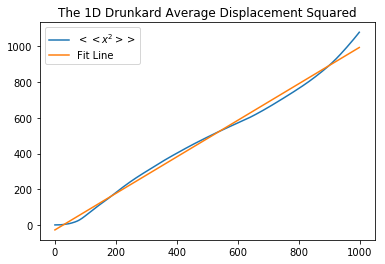

The approximate value of D, obtained through linear fit of the data, is 0.511602682601


In [46]:
nWalkers = 100
nSteps = 1000

steps = np.arange(0, nSteps)
var_var = variance_of_variance_1d(nWalkers, nSteps)
m,b = np.polyfit(steps, var_var, 1)

plt.plot(steps, var_var, label='$<<x^2>>$')
plt.plot(steps, m*steps + b, label='Fit Line')
plt.title("The 1D Drunkard Average Displacement Squared")
plt.legend()
plt.show()

print("The approximate value of D, obtained through linear fit of the data, is", m/2)

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

In [47]:
def variance_of_variance_3d(nWalkers, nSteps):
    dispsq = []
    position = [0,0,0]
    var = 0
    avg_var = 0
    var_of_var = []
    
    for i in range(nSteps):
        d = random()
        if ((d >= 1/6 and d < 1/3) or (d >= 1/2 and d < 2/3) or (d >= 5/6 and d < 1)):     #Determines if step forward or back
            change = 1
        else:
            change = -1
        
        if (d < 1/3):                          #Determines direction
            position[0] += change              #Update x position
        elif (d >= 1/3 and d < 2/3):
            position[1] += change              #Update y position
        else:
            position[2] += change              #Update z position

        var += position[0]**2 + position[1]**2 + position[2]**2
        
        avg_var += 1/(i+1)*var
        
        var_of_var.append(1/nWalkers*avg_var)
    np_var = np.array(var_of_var)
    return np_var

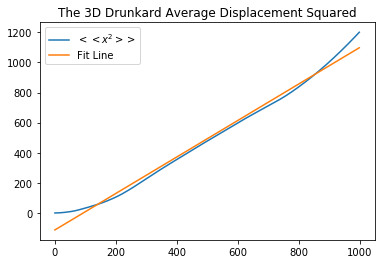

The approximate value of D, obtained through linear fit of the data, is 0.605496459117


In [53]:
nWalkers = 100
nSteps = 1000

xsq_avg = variance_of_variance_3d(nWalkers, nSteps)

steps = np.arange(0, nSteps)

m,b = np.polyfit(steps, xsq_avg, 1)

plt.plot(steps, xsq_avg, label='$<<x^2>>$')
plt.plot(steps, m*steps + b, label='Fit Line')
plt.title("The 3D Drunkard Average Displacement Squared")
plt.legend()
plt.show()

print("The approximate value of D, obtained through linear fit of the data, is", m/2)

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

In [63]:
def drunkard_2d(nSteps):
    xposition = []
    xpos = 0
    yposition = []
    ypos = 0
    disp = []
    for i in range(nSteps):
        p = random()
        if ((p >= 0.25 and p < 0.5) or (p >= 0.75 and p < 1)):
            change = 1
        elif ((p >= 0 and p < 0.25) or (p >= 0.5 and p < 0.75)):
            change = -1
            
        if (p < 0.5 and ((xpos + change) < 51) and ((xpos + change) > -50)):
            xpos += change
        elif (p >= 0.5 and ((ypos + change) < 51) and (ypos + change) > -50):
            ypos += change
            
        xposition.append(xpos)
        yposition.append(ypos)
    return xposition, yposition


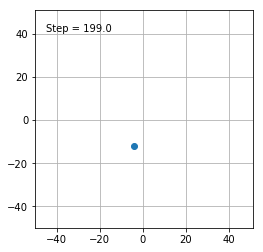

In [64]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

nSteps = 200
steps = np.arange(0,nSteps)

x, y = drunkard_2d(nSteps)

xnp = np.array(x)
ynp = np.array(y)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-50, 51), ylim=(-50, 51))
ax.axes.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o', lw=2)
time_template = 'Step = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text
    

# animation function. This is called sequentially
def animate(i):
    x = xnp[i]
    y = ynp[i]
    line.set_data(x, y)
    time_text.set_text(time_template % (i))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(steps)), init_func=init,  interval=25, blit=True)

HTML(anim.to_html5_video())

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

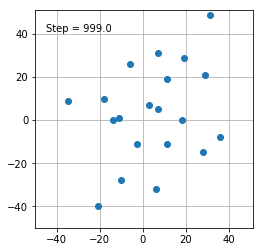

In [72]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

nSteps = 1000
steps = np.arange(0,nSteps)

thisSucks = np.zeros((42, len(steps)))
megaX = []
megaY = []
for i in range(1, 40, 2):
    thisSucks[i,:] ,thisSucks[i + 1,:] = drunkard_2d(nSteps)

    megaX.append(thisSucks[i,:])
    megaY.append(thisSucks[i + 1,:])

npMegX = np.array(megaX)
npMegY = np.array(megaY)
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-50, 51), ylim=(-50, 51))
ax.axes.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o', lw=2)
time_template = 'Step = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text
    

# animation function. This is called sequentially
def animate(i):
    x = [npMegX[1][i],npMegX[2][i],npMegX[3][i],npMegX[4][i],npMegX[5][i],npMegX[6][i],npMegX[7][i],npMegX[8][i],npMegX[9][i],npMegX[10][i],npMegX[11][i],npMegX[12][i],npMegX[13][i],npMegX[14][i],npMegX[15][i],npMegX[16][i],npMegX[17][i],npMegX[18][i],npMegX[19][i],npMegX[0][i]]
    y = [npMegY[1][i],npMegY[2][i],npMegY[3][i],npMegY[4][i],npMegY[5][i],npMegY[6][i],npMegY[7][i],npMegY[8][i],npMegY[9][i],npMegY[10][i],npMegY[11][i],npMegY[12][i],npMegY[13][i],npMegY[14][i],npMegY[15][i],npMegY[16][i],npMegY[17][i],npMegY[18][i],npMegY[19][i],npMegY[0][i]]
    line.set_data(x, y)
    time_text.set_text(time_template % (i))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(steps)), init_func=init,  interval=25, blit=True)

HTML(anim.to_html5_video())

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

In [128]:
def n_ball_volume(nDim, nAttempts):
    count = 0
    rand_dim = []
    for i in range(nAttempts):
        rand_dim = []
        radius = 0
        for j in range(nDim):
            rand_dim.append(random())
        for j in range(len(rand_dim)):
            radius += rand_dim[j]**2
        if (radius < 1):
            count += 1
    return count/nAttempts

In [145]:
nAttempts = 100000

for i in range(2, 7):
    nDim = i
    print("Estimation of", i, "sphere volume:", n_ball_volume(nDim, nAttempts))

Estimation of 2 sphere volume: 0.78368
Estimation of 3 sphere volume: 0.52646
Estimation of 4 sphere volume: 0.30873
Estimation of 5 sphere volume: 0.16318
Estimation of 6 sphere volume: 0.08129


In [147]:
#The analytic solution
from math import pi as pi
from math import gamma as gam

def analytic_balls(i):
    return (pi**(i/2))*(0.5**i)/gam(i/2 + 1)
      
for i in range(2,7):
    print("Volume of ", i, "sphere:", analytic_balls(i))

Volume of  2 sphere: 0.7853981633974483
Volume of  3 sphere: 0.5235987755982988
Volume of  4 sphere: 0.30842513753404244
Volume of  5 sphere: 0.16449340668482265
Volume of  6 sphere: 0.08074551218828077


### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

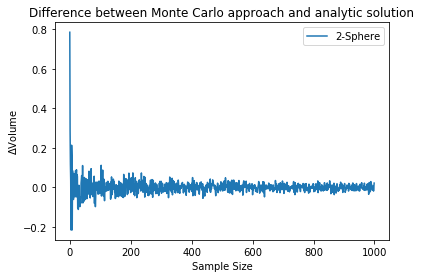

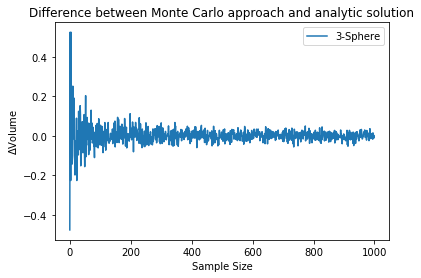

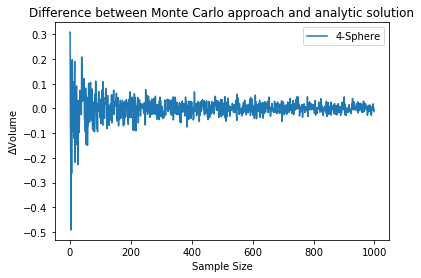

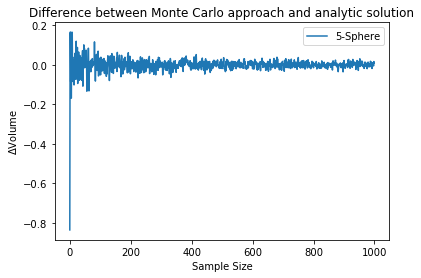

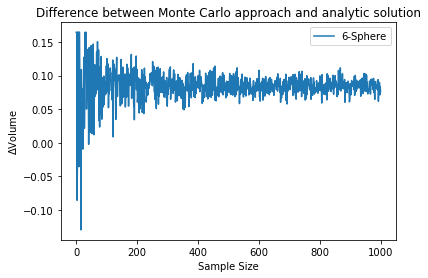

In [153]:
nAttempts = 1000

diff2 = []
diff3 = []
diff4 = []
diff5 = []
diff6 = []
for i in range(nAttempts):
    diff2.append(analytic_balls(2) - n_ball_volume(2, i+1))
    diff3.append(analytic_balls(3) - n_ball_volume(3, i+1))
    diff4.append(analytic_balls(4) - n_ball_volume(4, i+1))
    diff5.append(analytic_balls(5) - n_ball_volume(5, i+1))
    diff6.append(analytic_balls(5) - n_ball_volume(6, i+1))
    
np_diff2 = np.array(diff2)
np_diff3 = np.array(diff3)
np_diff4 = np.array(diff4)
np_diff5 = np.array(diff5)
np_diff6 = np.array(diff6)

attempts = np.arange(0, nAttempts)

plt.plot(attempts, np_diff2, label='2-Sphere')
plt.xlabel("Sample Size")
plt.ylabel("$\Delta$Volume")
plt.title("Difference between Monte Carlo approach and analytic solution")
plt.legend()
plt.show()

plt.plot(attempts, np_diff3, label='3-Sphere')
plt.xlabel("Sample Size")
plt.ylabel("$\Delta$Volume")
plt.title("Difference between Monte Carlo approach and analytic solution")
plt.legend()
plt.show()

plt.plot(attempts, np_diff4, label='4-Sphere')
plt.xlabel("Sample Size")
plt.ylabel("$\Delta$Volume")
plt.title("Difference between Monte Carlo approach and analytic solution")
plt.legend()
plt.show()

plt.plot(attempts, np_diff5, label='5-Sphere')
plt.xlabel("Sample Size")
plt.ylabel("$\Delta$Volume")
plt.title("Difference between Monte Carlo approach and analytic solution")
plt.legend()
plt.show()

plt.plot(attempts, np_diff6, label='6-Sphere')
plt.xlabel("Sample Size")
plt.ylabel("$\Delta$Volume")
plt.title("Difference between Monte Carlo approach and analytic solution")
plt.legend()
plt.show()

So, really it just appears that for the most part large sampling isn't super crucial for decent accuracy. However, for the 6-sphere there is a significant difference between the analytic solution and the solution achieved through the Monte Carlo approach.